This is the notebook attempted solution for ISLP Charpter 3 applied practice.
reference: 
* https://botlnec.github.io/islp/sols/chapter3/exercise8/
* https://botlnec.github.io/islp/sols/chapter3/exercise9/
* https://botlnec.github.io/islp/sols/chapter3/exercise10/
* https://botlnec.github.io/islp/sols/chapter3/exercise11/
* https://botlnec.github.io/islp/sols/chapter3/exercise12/
* https://botlnec.github.io/islp/sols/chapter3/exercise13/
* https://botlnec.github.io/islp/sols/chapter3/exercise14/

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sms
from statsmodels.graphics.gofplots import ProbPlot

## 3.8
This question involves the use of simple linear regression on the Auto data set.

(a) Use the `sm.OLS()` function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the `summarize()` function to print the results. Comment on the output. For example:

>i. Is there a relationship between the predictor and the response?

>ii. How strong is the relationship between the predictor and the response?

>iii. Is the relationship between the predictor and the response positive or negative?

>iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95 % confidence and prediction intervals?

In [3]:
auto = pd.read_csv('Auto.csv')
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [4]:
X = auto['horsepower']
y = auto['mpg']

In [5]:
X.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
y.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [7]:
# Deal with the '?' in X
droprow = X[X=='?'].index
X = X.drop(droprow)
y = y.drop(droprow)
X.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
# create dataframe for statsmodels
d = {'horsepower': X.astype('float'), 'mpg': y}
df = pd.DataFrame(data = d)
df.head(2)

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0


In [10]:
# using statsmodels for linear regression
model = smf.ols(formula = 'mpg ~ horsepower', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           7.03e-81
Time:                        13:23:28   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [14]:
new_df = pd.DataFrame({'intercept':[1],'horsepower':[98]})
new_predictions = res.get_prediction(new_df)
new_predictions.predicted_mean

array([24.46707715])

In [15]:
# We can produce confidence intervals for the predicted values.
new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [16]:
# Prediction intervals are computing by setting obs=True:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

## Answer to 
i. Yes, there is a relationship between 'mpg' and 'horsepower'. F statistics is very large and diff from zero, and p_value is close to zero.

ii. Since R-square is just 0.606, we can say approximately 60% of the variance in mpg is explained by horsepower.

iii. the relation is negative because the coeffcient corresponding to horsepower is -0.1578.

iv. predicted value is 24.46, 95% confidence interval is [23.97307896, 24.96107534], and 95% prediction interval is [14.80939607, 34.12475823]

(b) Plot the response and the predictor in a new set of axes ax. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.


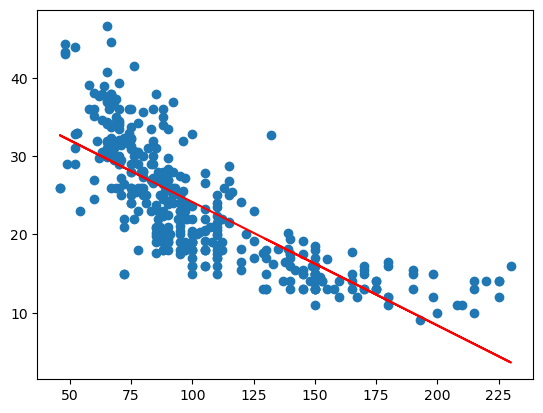

In [17]:
plt.subplots(1,1)
plt.scatter(X.astype('float'),y);
plt.plot(X.astype('float'), res.fittedvalues,color='red')



In [29]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

(26.68, 249.32)

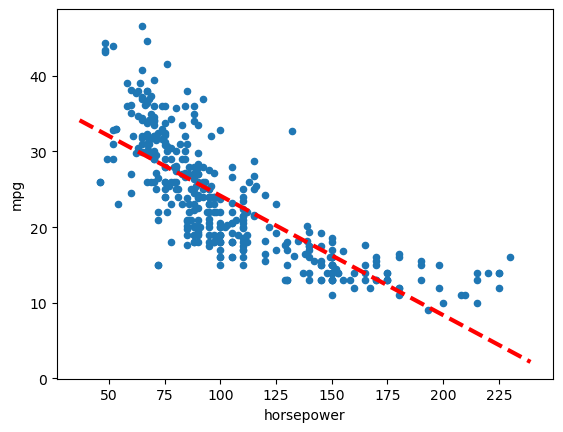

In [31]:
ax = df.plot.scatter('horsepower','mpg')
abline(ax,
       res.params[0],
       res.params[1],
       'r--',
       linewidth=3)
a = ax.get_xlim()
a

(c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

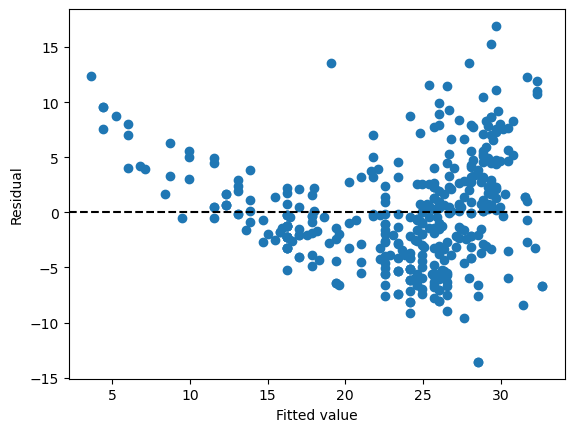

In [21]:
# residual plots
plt.subplots(1,1)
plt.scatter(res.fittedvalues, res.resid)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.axhline(0, c='k', ls='--');

The residual plots indicate that there is a strong non-linearity. the funnel shape indicate there is a presence of hereroscedasticity.

115

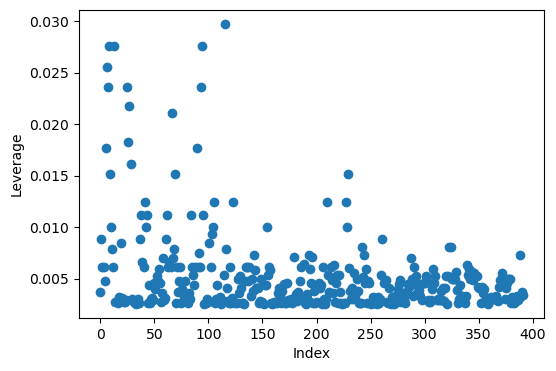

In [32]:
# leverage plot/get most inflencial point
infl = res.get_influence()
ax = plt.subplots(figsize=(6,4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)

ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


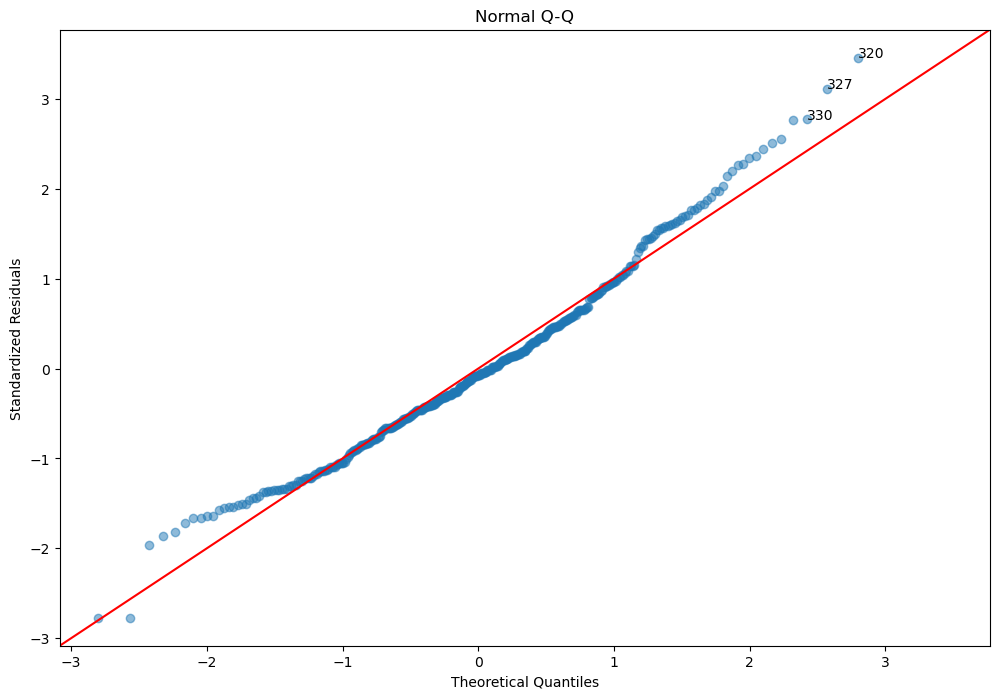

In [37]:
# model residuals
model_residuals = res.resid

# normalized residuals
model_norm_residuals = res.get_influence().resid_studentized_internal

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

**The qq-plot indicates that the assumption of normality does hold**, since we can fit a straight line quite well, although there seems to be a slight left skew.

The links below provide nice explanations and intuitions of the concept of qq-plots and pp-plots and how to interpret them.

https://stats.stackexchange.com/questions/52212/qq-plot-does-not-match-histogram/52221#52221
https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
https://xiongge.shinyapps.io/QQplots/
https://stats.stackexchange.com/questions/92141/pp-plots-vs-qq-plots/100383#100383


## 3.9
This question involves the use of multiple linear regression on the `Auto` data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [39]:
# drop the '?' value from dataset
auto = pd.read_csv('auto.csv', na_values='?').dropna()
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320


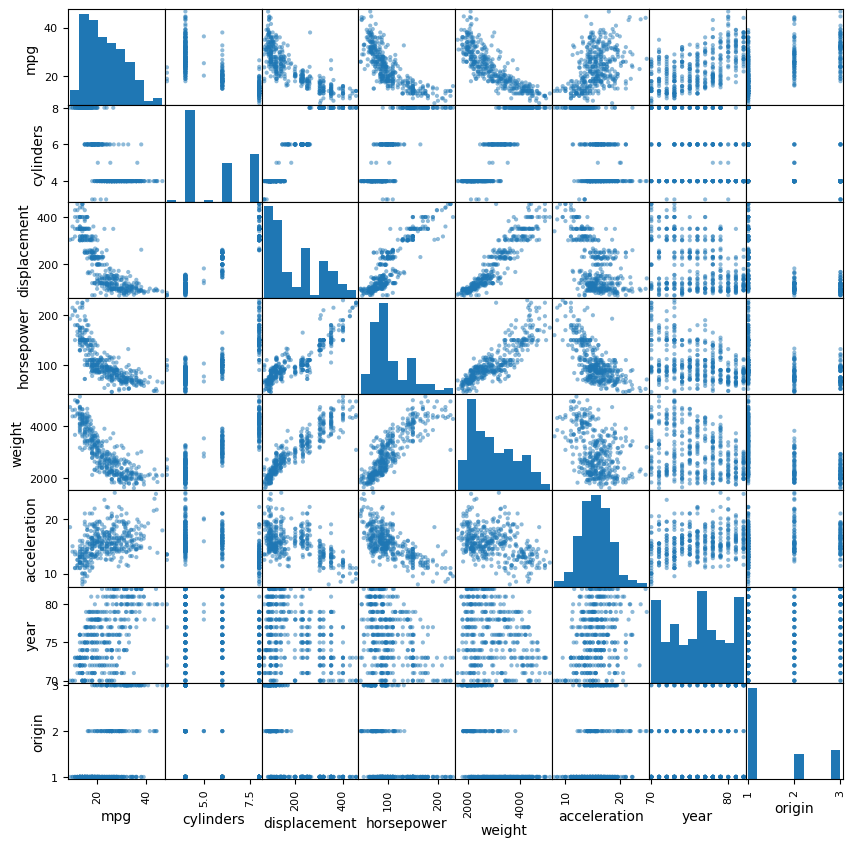

In [42]:
pd.plotting.scatter_matrix(auto,figsize=(10,10));

(b) Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [43]:
auto.corr()

/var/folders/b4/dg1qfb_d7dlfv97__53drbzr0000gn/T/ipykernel_93070/668445388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


/var/folders/b4/dg1qfb_d7dlfv97__53drbzr0000gn/T/ipykernel_93070/971918435.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = auto.corr()


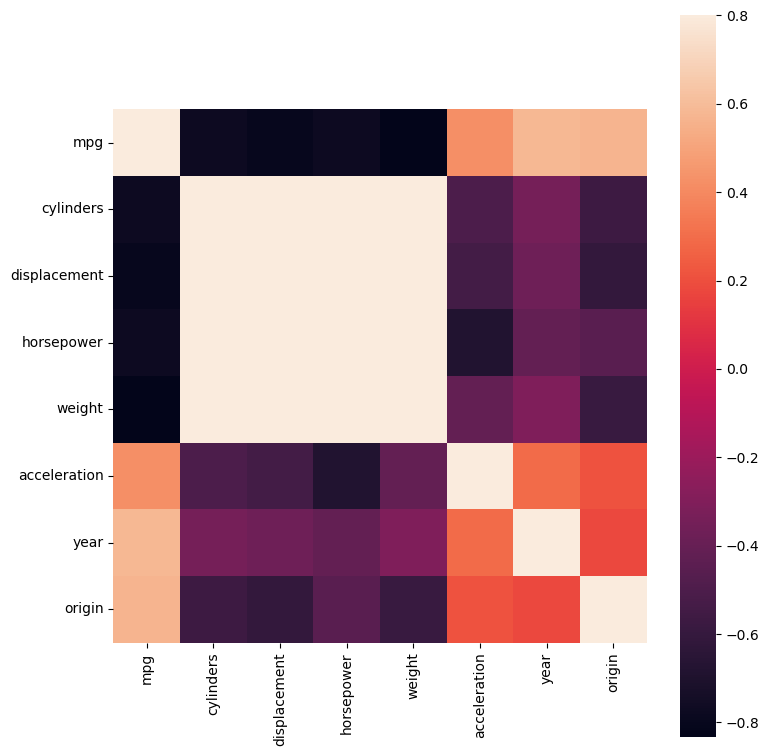

In [45]:
# a correlation heatmap
corrmat = auto.corr()
f,ax = plt.subplots(figsize = (8,8))

sns.heatmap(corrmat, vmax =.8, square=True);
f.tight_layout()

(c) Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:

i. Is there a relationship between the predictors and the re- sponse? Use the `anova_lm()` function from `statsmodels` to answer this question.

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

In [46]:
res = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
              auto).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          2.04e-139
Time:                        14:39:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Answers to:
i. Yes, there is relationships between response and predictor, because F-stats is high, ans we can reject null hypothesis.

ii.the predictor has a statistically significant relationship to the response are 'weight', 'year', and 'origin'

iii. the coffiencient suggest that, on average, when the other variable are held constant, an increase of one year lead to an increase of 0.75 of mpg.

(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

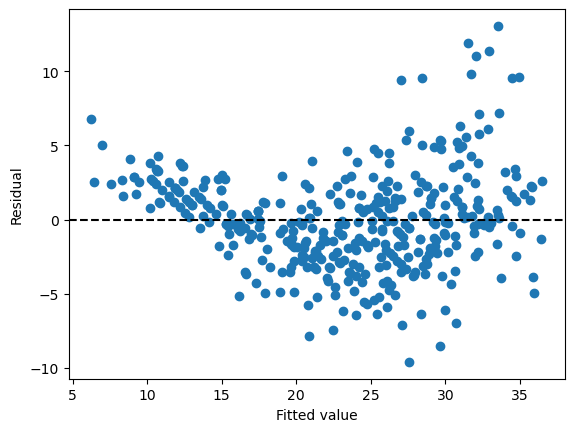

In [47]:
# residual plots
plt.subplots(1,1)
plt.scatter(res.fittedvalues, res.resid)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.axhline(0, c='k', ls='--');

13

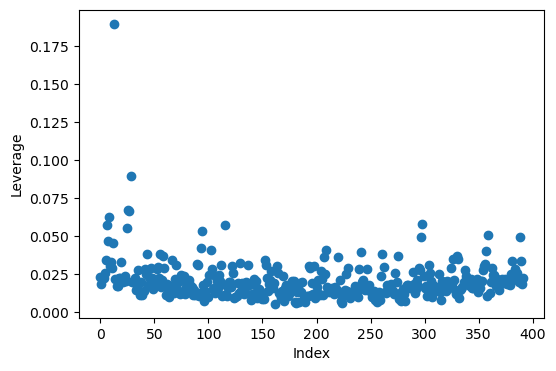

In [48]:
# leverage plot/get most inflencial point
infl = res.get_influence()
ax = plt.subplots(figsize=(6,4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)

ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


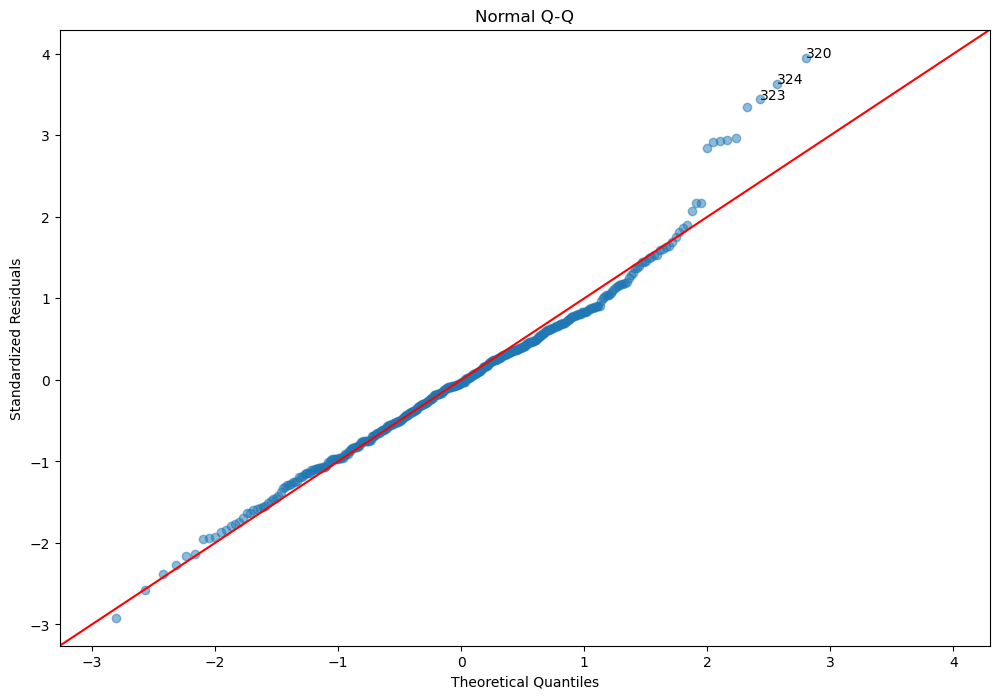

In [49]:
# normalized residuals
model_norm_residuals = res.get_influence().resid_studentized_internal

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

## comments:
* No, there are no unusuall large outliers based on the residual plot. However, it is skewly distributed. The larger the fitted value, the larger the variance, and the spread of the residual increases.
* No, even though there is an observation with higher leverage, it si still with in Cook's 0.5 distance
* The qq plot deviates at one extreme, which indicat that there are other explanatory predictors that we are not considering(e.g. quardratic terms).
* The funnel shape of residual plot indicate heteroskedacity.

(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

**Note:** Statsmodels uses patsy which is a "mini-language" inspired by R and S to describe statistical models. The symbols ':' and '*' have the same meaning as in R. Namely, a:b includes an interaction term between a and b, while a*b is shorthand for a + b + a:b, that is, it includes a and b as well.

References:

http://patsy.readthedocs.io/en/latest/formulas.html

http://stackoverflow.com/questions/33050104/difference-between-the-interaction-and-term-for-formulas-in-statsmodels-ols

http://stackoverflow.com/questions/23672466/interaction-effects-in-patsy-with-patsy-dmatrices-giving-duplicate-columns-for

So, which pairs of variables would we expect to interact, both a priori (from our interpretation of the meaning of these variables) and from the pairs plot?

Perhaps horsepower and year? What would this mean? It would mean that, for different years, varying horsepower has different effect on mpg. It seems plausible. We could also interpret it in the reverse order: for different values of horsepower, does varying year have a different effect on mpg? For example, does the change in mpg when varying year (i.e., the derivative dmpg/dyear), differ when holding horsepower at either 130 or 160?

In [52]:
model = 'mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin + displacement:weight + displacement:year \
               + horsepower:origin + horsepower:weight + horsepower:year + origin:weight + origin:year + weight:year'
res = smf.ols(model, auto).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.09e-162
Time:                        15:06:25   Log-Likelihood:                -945.49
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     376   BIC:                             1987.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -51.3746     26.175     -1.963      0.050    -102.843       0.093
displacement               -0.1818      0.120     -1.521      0.129      -0.417       0.053
horsepower                  0.9485      0.232      4.089      0.000       0.492       1.405
origin                     -3.0637      5.496     -0.557      0.578     -13.871       7.744
weight                     -0.0174      0.016     -1.115      0.265      -0.048       0.013
year                        1.3975      0.328      4.267      0.000       0.754       2.042
displacement:horsepower    -0.0001      0.000     -0.815      0.416      -0.000       0.000
displacement:origin         0.0282      0.013      2.172      0.030       0.003       0.054
displacement:weight      2.792e-05   5.99e-06      4.663      0.000    1.61e-05    3.97e-05
displacement:year           0.0010      0.001      0.710      0.478      -0.002       0.004
horsepower:origin          -0.0629      0.020     -3.104      0.002      -0.103      -0.023
horsepower:weight       -1.175e-05   1.77e-05     -0.664      0.507   -4.65e-05     2.3e-05
horsepower:year            -0.0114      0.003     -3.998      0.000      -0.017      -0.006
origin:weight               0.0014      0.001      1.200      0.231      -0.001       0.004
origin:year                 0.0322      0.069      0.464      0.643      -0.104       0.169
weight:year              7.438e-05      0.000      0.394      0.694      -0.000       0.000
==============================================================================
Omnibus:                       52.658   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.208
Skew:                           0.710   Prob(JB):                     9.61e-26
Kurtosis:                       5.244   Cond. No.                     1.81e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
res = smf.ols('mpg ~ displacement + horsepower*year + weight + origin',
              auto).fit()
res.summary()|

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     367.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          7.51e-156
Time:                        15:01:42   Log-Likelihood:                -987.81
No. Observations:                 392   AIC:                             1990.
Df Residuals:                     385   BIC:                             2017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -96.6688      9.667    -10.000      0.000    -115.675     -77.663
displacement        0.0068      0.005      1.344      0.180      -0.003       0.017
horsepower          0.7993      0.092      8.687      0.000       0.618       0.980
year                1.8179      0.128     14.221      0.000       1.567       2.069
horsepower:year    -0.0113      0.001     -8.977      0.000      -0.014      -0.009
weight             -0.0054      0.001    -10.170      0.000      -0.006      -0.004
origin              1.1866      0.253      4.684      0.000       0.688       1.685
==============================================================================
Omnibus:                       21.932   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.066
Skew:                           0.411   Prob(JB):                     6.60e-08
Kurtosis:                       4.161   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comments:
These results indicate that the interactions that appear to be statistically significant are displacement:weight, horsepower:origin and horsepower:year. Interestingly, when these are considered the only first order terms that are statistically different are horsepower and year. By the hierarchy principle (page 89), we should nonetheless include all of the main effects (for more on this, see [these answers](https://stats.stackexchange.com/questions/27724/do-all-interactions-terms-need-their-individual-terms-in-regression-model).

(f) Try a few different transformations of the variables, such as  $log(X), \sqrt{X}, X^2$. Comment on your findings.

In [53]:
# add a square term
res = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + weight + year + origin', auto).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     439.5
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          7.11e-157
Time:                        15:11:37   Log-Likelihood:                -988.57
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     386   BIC:                             2013.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.6457      3.915     -1.698      0.090     -14.343       1.052
horsepower                 -0.2441      0.027     -9.099      0.000      -0.297      -0.191
np.power(horsepower, 2)     0.0008   9.13e-05      9.170      0.000       0.001       0.001
weight                     -0.0044      0.000    -10.426      0.000      -0.005      -0.004
year                        0.7456      0.046     16.145      0.000       0.655       0.836
origin                      1.0465      0.238      4.405      0.000       0.579       1.514
==============================================================================
Omnibus:                       21.819   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.447
Skew:                           0.414   Prob(JB):                     9.00e-08
Kurtosis:                       4.140   Cond. No.                     4.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
res = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower)+weight + year + origin', auto).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     378.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          4.62e-158
Time:                        15:12:37   Log-Likelihood:                -982.62
No. Observations:                 392   AIC:                             1979.
Df Residuals:                     385   BIC:                             2007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  80.3681     25.568      3.143      0.002      30.098     130.638
horsepower                  0.2570      0.148      1.737      0.083      -0.034       0.548
np.power(horsepower, 2)    -0.0002      0.000     -0.571      0.568      -0.001       0.000
np.log(horsepower)        -27.5412      8.000     -3.443      0.001     -43.270     -11.812
weight                     -0.0048      0.000    -11.098      0.000      -0.006      -0.004
year                        0.7561      0.046     16.565      0.000       0.666       0.846
origin                      0.9480      0.236      4.016      0.000       0.484       1.412
==============================================================================
Omnibus:                       17.905   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.299
Skew:                           0.312   Prob(JB):                     4.34e-07
Kurtosis:                       4.185   Cond. No.                     2.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
res = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower)+np.sqrt(horsepower)+weight + year + origin', auto).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     332.9
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          9.16e-159
Time:                        15:13:05   Log-Likelihood:                -977.89
No. Observations:                 392   AIC:                             1972.
Df Residuals:                     384   BIC:                             2004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -426.3991    167.288     -2.549      0.011    -755.314     -97.485
horsepower                  8.4452      2.676      3.156      0.002       3.184      13.706
np.power(horsepower, 2)    -0.0060      0.002     -3.117      0.002      -0.010      -0.002
np.log(horsepower)        416.0064    144.951      2.870      0.004     131.009     701.004
np.sqrt(horsepower)      -229.6161     74.927     -3.065      0.002    -376.934     -82.298
weight                     -0.0048      0.000    -11.229      0.000      -0.006      -0.004
year                        0.7475      0.045     16.522      0.000       0.659       0.836
origin                      0.9088      0.234      3.886      0.000       0.449       1.369
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.804
Skew:                           0.411   Prob(JB):                     6.18e-09
Kurtosis:                       4.281   Cond. No.                     2.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Comments:
* From 1st model, It is clear that this quadratic term is statistically significant. 
* From 2nd model, it seems the non-linear relation is better captured by log terms than quadratic terms
* from the 3rd model, the square term is back to a small p-value, indicating that it is statistically significant in the presence of the square root and the logarithm.

## 3.10
This question should be answered using the `Carseats` data set.

(a) Fit a multiple regression model to predict `Sales` using `Price`,
`Urban`, and `US`.

In [58]:
carseat = pd.read_csv('Carseats.csv')
carseat.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [59]:
res = smf.ols(formula = 'Sales ~ Price + Urban + US', data = carseat).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.39e-23
Time:                        15:22:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

* Urban. This coefficient is not statistically significant, suggesting that there is no relationship between this variable and the sales.
* US. Qualitative variable with positive relationship. This means that when the observation is US, there will be a tendency for higher sales values. On average, if a store is located in the US, it will sell 1201 more units, approximately.
* Price. Quantitative variable with negative relationship. This means that the higher the prices, the lower the sales. On average, for every dollar that the price increases sales will drop by 55 units, approximately.

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$$
sales = 13.04 -0.0219*Urban(=1) + 1.2*US(=1) -0.054 *price
$$

(d) For which of the predictors can you reject the null hypothesis $H_0 :β_j =0$?

US and price

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [60]:
res = smf.ols(formula = 'Sales ~ Price + US', data = carseat).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.66e-24
Time:                        15:27:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

Since **R-squared** has the same value, namely 0.239, for both models we can conclude that the strictly smaller model (e), is a better model since it uses less variables for the same value of R-squared. This can also be seen in the value of the adjusted R-squared which is smaller for (e). In any case neither model fits the data very well given the low value of R-squared.



(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [62]:
conf_intervals = res.conf_int(alpha=0.05)
conf_intervals

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

### This time I will use a plot of standardized residuals against leverages
reference: https://botlnec.github.io/islp/sols/chapter3/exercise10/

In [65]:
#plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'Sales ~ Price + US'

df.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=carseat)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

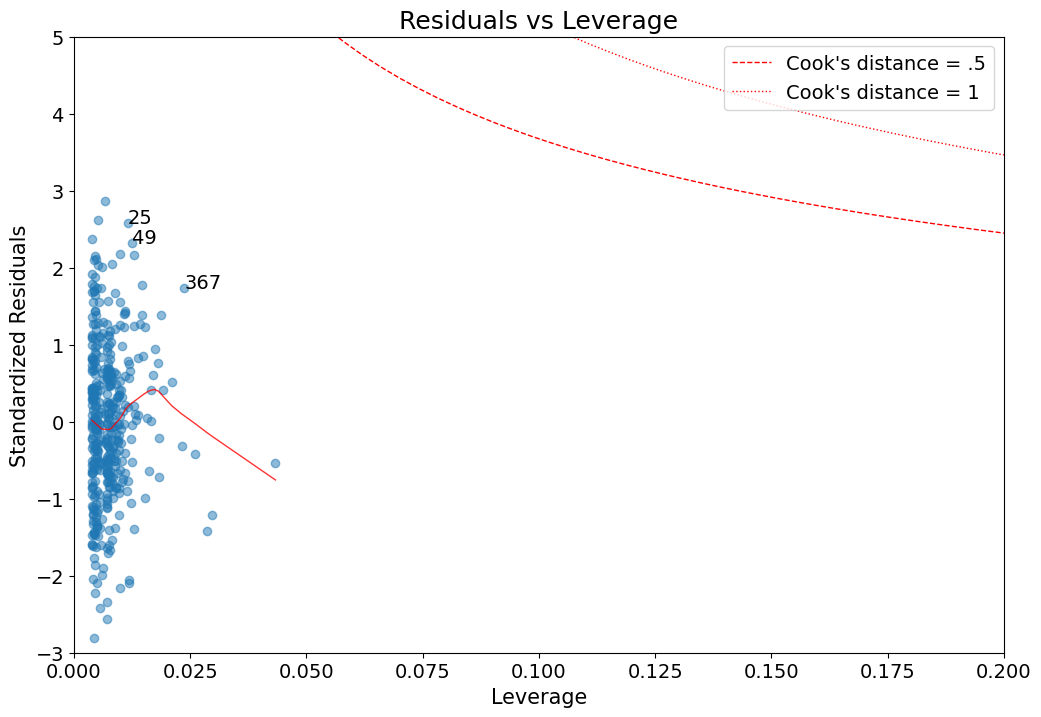

In [67]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');

## 3.11.
In this problem we will investigate the t-statistic for the null hypothesis $H_0 : β = 0$ in simple linear regression without an intercept. To begin, we generate a predictor `x` and a response `y` as follows.

In [68]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

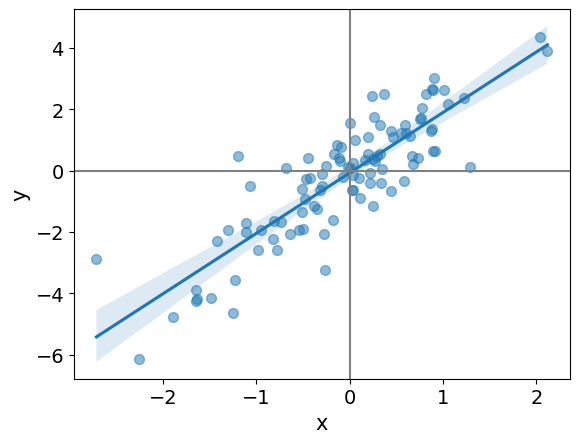

In [69]:
df = pd.DataFrame({'x':x,'y':y})
fig, ax = plt.subplots()
sns.regplot(x = 'x', y = 'y', data = df,scatter_kws = {'s': 50, 'alpha': 0.5}, ax = ax)
ax.axhline(color='gray')
ax.axvline(color='gray')

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate $\hat{β}$, the standard error of this coefficient estimate, and the $t$-statistic and $p$-value associated with the null hypothesis $H_0 : β = 0$. Comment on these results. (You can perform regression without an intercept using the keywords argument `intercept=False` to `ModelSpec()`.)

In [72]:
# +0 means no intercept
res = smf.ols('y ~ x + 0', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                    6.23e-31
Time:                        16:23:19   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
res = smf.ols('y ~ x', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.74e-30
Time:                        16:21:46   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0760      0.101     -0.756      0.451      -0.276       0.124
x              1.9686      0.118     16.734      0.000       1.735       2.202
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : β = 0$. Comment on these results.

In [73]:
res = smf.ols('x ~ y + 0', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                    6.23e-31
Time:                        16:25:49   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(c) What is the relationship between the results obtained in (a) and (b)?



* The t-statistic is the same in two models. why it is the same? see question (e).
* the coeficients in two models are NOT the inverse of each other? why?

> The insight is  [here](https://stats.stackexchange.com/questions/20553/effect-of-switching-response-and-explanatory-variable-in-simple-linear-regressio/20560#20560)

>  it has to do with the fitting method and with the non-symmetric loss function.If we use a loss function symmetrical in x and y (as the rectangles or total least squares regression, or PCA, figured below), then the coeffiecients will be the same.

> see detailof answers [here](https://botlnec.github.io/islp/sols/chapter3/exercise11/)

(d)
![](https://drive.google.com/uc?export=view&id=181VaG64IjGX1yrsZbmgmPRGhazDGGSJL)

We start with a simplification of a part of the formula for SE(β̂ )
:

$\sum_{i=1}^{n} (y_i - x_i \beta)^2 = \sum_{i=1}^{n} (y_i^2 - 2 x_i \beta + x_i^2 \beta^2) = \sum_{i=1}^{n} y_i^2 - 2 \beta \sum_{i=1}^{n} x_i + \beta^2 \sum_{i=1}^{n} x_i^2 $

which using the formula (3.38) from the textbook

$ \hat{β} = \sum_{i=1}^{n}x_iy_i/\sum_{i=1}^{n}x_j^2$
 
 becomes:

$ \sum_{i=1}^{n} y_i^2 - 2 \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{j=1}^{n} x_j^2 } + \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{j=1}^{n} x_j^2 } = \sum_{i=1}^{n} y_i^2 - \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2 }.$

With this, we restart from the formula for the t-statistic and simplify:

$\frac{\hat{\beta}}{SE(\hat{\beta})}= \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} \sqrt{\sum_{i=1}^{n} x_i^2} }{ ( \sum_{i=1}^{n} x_i^2 ) \sqrt{\sum_{i=1}^{n} (y_i - x_i \beta)^2}} = \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 ) \sum_{i=1}^{n} (y_i - x_i \beta)^2}} $

where we now substitute our previous simplification in the denominator:

$ \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 ) \left( \sum_{i=1}^{n} y_i^2 - \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2 } \right)}} = \frac{ (\sqrt{n-1} ) \sum_{i=1}^{n} x_i y_i }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 )( \sum_{i=1}^{n} y_i^2 ) - (\sum_{i=1}^{n} x_i y_i)^2 } }, $

as we wanted.



(e) Using the results from (d), argue that the t-statistic for the regression of `y` onto `x` is the same as the t-statistic for the regression of `x` onto `y`.

Since the expression for the t-statistic is symmetric in $x_i$
 and $y_i$, it will have the same value whether we regress Y on X or X on Y.

(f) In python, show that when regression is performed with an intercept, the t-statistic for $H_0 : β_1 = 0$ is the same for the regression of y onto x as it is for the regression of `x`onto `y`.


In [74]:
regyx = smf.ols('y ~ x',df).fit()
regxy = smf.ols('x ~ y',df).fit()
print(regyx.tvalues)
print(regxy.tvalues)

Intercept    -0.756096
x            16.734055
dtype: float64
Intercept     0.216082
y            16.734055
dtype: float64


### Reference
* https://stats.stackexchange.com/questions/20553/effect-of-switching-response-and-explanatory-variable-in-simple-linear-regressio
* https://stats.stackexchange.com/questions/22718/what-is-the-difference-between-linear-regression-on-y-with-x-and-x-with-y

## 3.12. 
This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $ \hat{β}$ for the linear regression of `Y` onto `X` without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of `X` onto `Y` the same as the coefficient estimate for the regression of `Y` onto `X`?

$ \hat{β}_{yx}=cov(X,Y)/var(Y)$

$ \hat{β}_{xy}=cov(X,Y)/var(X)$

So the estimation will be same when var(Y) = var(X), which is not the case in general.

(b) Generate an example in Python with `n = 100` observations in which the coefficient estimate for the regression of `X` onto `Y` is different from the coefficient estimate for the regression of `Y` onto `X`.

In [13]:
# even when the underlysing model is y = x, the var(x) and var(y)
# will be different
rng = np.random.default_rng(1)
x = rng.normal(0,1,size=100)
y = x + rng.normal(0,0.1,size=100)

In [14]:
df = pd.DataFrame({'x':x, 'y':y})
regyx = smf.ols('y ~ x + 0',df).fit()
regyx.params

x    0.997624
dtype: float64

In [15]:
df = pd.DataFrame({'x':x, 'y':y})
regyx = smf.ols('x ~ y+ 0',df).fit()
regyx.params

y    0.988927
dtype: float64

(c) Generate an example in Python with `n = 100` observations in which the coefficient estimate for the regression of `X` onto `Y` is the same as the coefficient estimate for the regression of `Y` onto `X`.

In [16]:
# the only way to get var(x) = var(y) is to let y=x
y = np.random.permutation(x)

df = pd.DataFrame({'x':x, 'y':y})
regyx = smf.ols('y ~ x+ 0',df).fit()
regyx.params

x   -0.016586
dtype: float64

In [17]:
df = pd.DataFrame({'x':x, 'y':y})
regyx = smf.ols('x ~ y + 0',df).fit()
regyx.params

y   -0.016586
dtype: float64

Finally, we got the same parameter. But it is really rare to see this case.

## 3.13.
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

(a) Using the `normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from a `N(0,1)` distribution. This represents a feature, `X`.

In [11]:
rng = np.random.default_rng(1)
x = rng.normal(0,1,100)

(b) Using the `normal()` method, create a vector, eps, containing 100 observations drawn from a `N(0,0.25)` distribution—a normal distribution with mean zero and variance 0.25.


In [19]:
eps = rng.normal(0,0.25,100)

(c) Using `x` and `eps`, generate a vector `y` according to the model
$$
Y =−1+0.5X+ε. (3.39)
$$
What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

In [28]:
y = -1 + 0.5*x + eps
# the intercept is -1, and parameter is 0.5

(d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

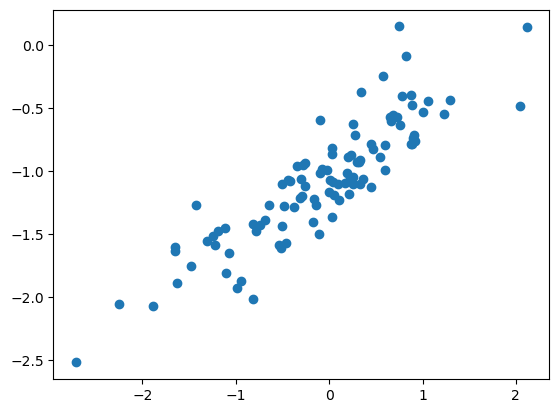

In [29]:
plt.subplot(1,1,1)
plt.scatter(x,y)

(e) Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $β_0$ and $β_1$ compare to $β_0$ and $β_1$?

In [30]:
df = pd.DataFrame({'x':x, 'y':y})
res = smf.ols('y ~ x',df).fit()
res.params

Intercept   -1.040482
x            0.496805
dtype: float64

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

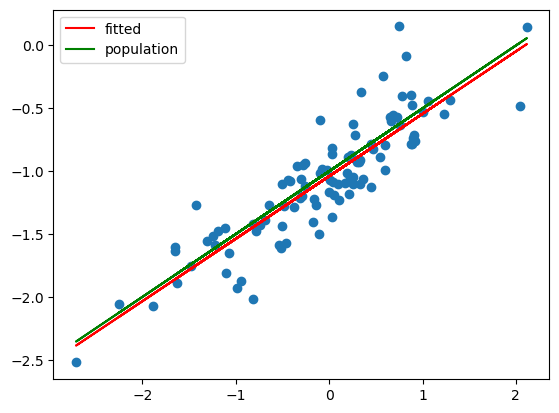

In [53]:
plt.scatter(df.x,df.y)

fit, = plt.plot(x, res.fittedvalues,color='red',label='fit')

ypop = -1 + 0.5*x
pop, = plt.plot(x, ypop, color = 'green', label='pop')
plt.legend([fit,pop],['fitted','population'])


(g) Now fit a polynomial regression model that predicts `y` using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [55]:
res = smf.ols('y ~ x + np.square(x)',df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     166.6
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           4.20e-32
Time:                        14:29:04   Log-Likelihood:                 5.8374
No. Observations:                 100   AIC:                            -5.675
Df Residuals:                      97   BIC:                             2.141
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0418      0.027    -37.993      0.000      -1.096      -0.987
x                0.4977      0.029     17.114      0.000       0.440       0.555
np.square(x)     0.0019      0.021      0.089      0.929      -0.040       0.043
==============================================================================
Omnibus:                        8.968   Durbin-Watson:                   2.520
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.071
Skew:                           0.521   Prob(JB):                      0.00650
Kurtosis:                       4.155   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $ε$ in (b). Describe your results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5674.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.49e-88
Time:                        14:36:23   Log-Likelihood:                 148.48
No. Observations:                 100   AIC:                            -293.0
Df Residuals:                      98   BIC:                            -287.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0050      0.006   -180.817      0.000      -1.016      -0.994
x              0.4898      0.007     75.326      0.000       0.477       0.503
==============================================================================
Omnibus:                        2.987   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.934
Skew:                          -0.108   Prob(JB):                        0.380
Kurtosis:                       2.354   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

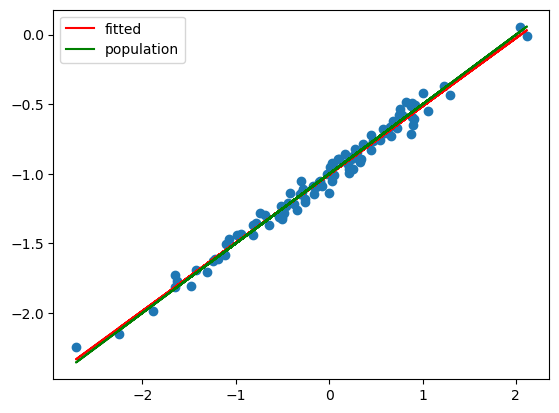

In [58]:
# decrease sd to 0.05 in epsilon 
eps = rng.normal(0,0.05,100)
y = -1 + 0.5*x + eps
df = pd.DataFrame({'x':x, 'y':y})

res = smf.ols('y ~ x',df).fit()
# plot the compare fit
plt.scatter(df.x,df.y)

fit, = plt.plot(x, res.fittedvalues,color='red',label='fit')

ypop = -1 + 0.5*x
pop, = plt.plot(x, ypop, color = 'green', label='pop')
plt.legend([fit,pop],['fitted','population'])

# check the results and p_values and F_values
res.summary()

(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $ε$ in (b). Describe your results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     6.907
Date:                Tue, 30 Apr 2024   Prob (F-statistic):            0.00997
Time:                        14:37:01   Log-Likelihood:                -149.14
No. Observations:                 100   AIC:                             302.3
Df Residuals:                      98   BIC:                             307.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1041      0.109    -10.128      0.000      -1.320      -0.888
x              0.3352      0.128      2.628      0.010       0.082       0.588
==============================================================================
Omnibus:                        0.201   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.371
Skew:                           0.067   Prob(JB):                        0.831
Kurtosis:                       2.733   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

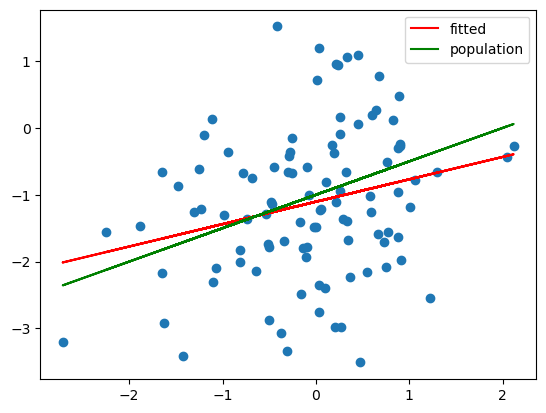

In [59]:
# increase sd to 1 in epsilon 
eps = rng.normal(0,1,100)
y = -1 + 0.5*x + eps
df = pd.DataFrame({'x':x, 'y':y})

res = smf.ols('y ~ x',df).fit()
# plot the compare fit
plt.scatter(df.x,df.y)

fit, = plt.plot(x, res.fittedvalues,color='red',label='fit')

ypop = -1 + 0.5*x
pop, = plt.plot(x, ypop, color = 'green', label='pop')
plt.legend([fit,pop],['fitted','population'])

# check the results and p_values and F_values
res.summary()

(j) What are the confidence intervals for $β_0 $ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

### Answer: 
The lower the noise, the better the fit, the CI and R-square

## 3.14.
This problem focuses on the collinearity problem.

(a) Perform the following commands in Python:

In [69]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?

it is obvious.

(b) What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.

In [70]:
np.corrcoef(x1,x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

The correlation coefficient is 0.78, and we can see there this positive correlations between x1 and x2 in the plot below.

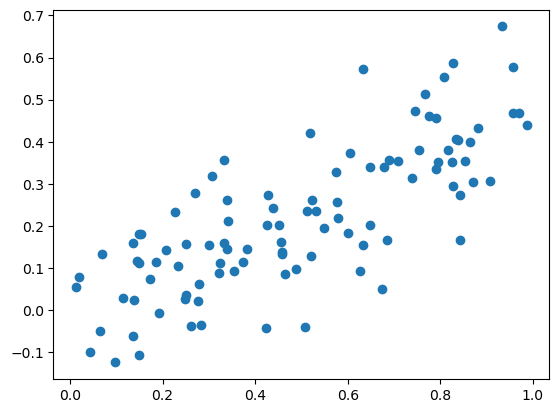

In [71]:
plt.scatter(x1,x2);

(c) Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $β_0, β_1$, and $β_2$? How do these relate to the true $β_0, β_1$, and $β_2$? Can you reject the null hypothesis $H_0 : β_1 = 0$? How about the null hypothesis $H_0 : β_2 = 0$?

In [72]:
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
res = smf.ols('y ~ x1 + x2', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           5.76e-08
Time:                        14:47:16   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(d) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0 :β_1 =0$?

In [73]:
res = smf.ols('y ~ x1', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.37e-08
Time:                        14:47:41   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient value increased to 2.0771 and R square reduced a little bit. The null hypothesis can be rejected and the alternative hypothesis accepted because p-value is zero. It can be said that this results are in line with our expectations from (c).



(e) Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0 :β_1 =0$?

In [74]:
res = smf.ols('y ~ x2', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           7.43e-07
Time:                        14:49:18   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient value increased to 2.91 and R square reduced a little more. The null hypothesis can be rejected and the alternative hypothesis accepted because p-value is zero. The result is significantly diff from our expectations from (c).

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

The results do NOT contradict. 
What's happening here is a collinearity phenomenon. 

As suggested by the high correlation values and by the scatter plot (and, of course, from the generation of `Y`), we can linearly predict `x1` from `x2`
 (and vice-versa) with a substantial degree of accuracy. This is a clue of collinearity that is confirmed by the regression model. 
 
When both variables are combined in the same linear model, one of them loses explanatory power because the variance it explains is already being explained by the other variable. Accordingly, if considered individually, both variables lead to the rejection of the null hypothesis but, if considered together, one of the variables is dismissable.

Finally, the values of the coefficients agree with what we know from the underlying model. If one writes $X_2$ in terms of $X_1$, substitutes it in the model and adds both coefficients of $X_1$, we get $2.15$. This value is well within the confidence interval calculated in (d), namely [1.892; 3.001]. Likewise, for $X_2$ the expected value of the coefficient is 4.3 which is inside the [2.600; 4.614] interval calculated in (e).



(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function `np.concatenate()` to add this additional observation to each of `x1, x2 and y`.

In [75]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])


Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [76]:
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
res = smf.ols('y ~ x1 + x2', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           4.60e-08
Time:                        15:04:19   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
res = smf.ols('y ~ x1', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           9.23e-07
Time:                        15:04:26   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
res = smf.ols('y ~ x2', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           3.13e-08
Time:                        15:04:30   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Effect on models: 

* Model (c). R-squared decreased, which means that the predictive capacity of the model was reduced. The value of the regression coefficients changed: x1 coefficient decreased and x2 coefficient increased. As a consequence, x2 became the coefficient with higher value. The null hypothesis is now rejected in both variables.

* Model (d). The only significant change was the reduction of R-squared.

* Model (e). The only significant change was a small increase of R-squared.


## Outliers and high leverage points analysis
#### **Outliers**

An outlier is a point for which $y_i$ is far from the expected range predicted by the fit of the model. This raises the question of whether it is representative of the population.

Outliers can be identified from a univariate, bivariate, or multivariate perspective based on the number of variables (characteristics) considered. We should use as many perspectives as possible, looking for a consistent pattern across them to identify outliers.

Cases that fall markedly outside the range of other observations will be seen as isolated points in the scatterplot. A drawback of the bivariate method in general is the potentially large number of scatterplots that arise as the number of variables increases. For 3 variables, it is only 3 graphs for all pairwise comparisons. But for 5 variables, it takes 10 graphs, and for 10 variables it takes 45 scatterplots! Since this analysis doesn't involve more than 2 variables, we can perform all pairwise comparisons.

#### **High leverage points**

We just saw that outliers are observations for which the response $y_i$ is unusual given the predictor $x_i$
* In contrast, observations with high leverage have an unusual value for $x_i$
* In statistics, particularly in regression analysis, leverage is a measure of how far away the independent variable values of an observation are from those of the other observations.

In a simple linear regression, high leverage observations are fairly easy to identify, since we can simply look for observations for which the predictor value is outside of the normal range of the observations. With a single predictor, an extreme x value is simply one that is particularly high or low.

But in a multiple linear regression with many predictors, it is possible to have an observation that is well within the range of each individual predictor’s values, but that is unusual in terms of the full set of predictors. With multiple predictors, extreme x values may be particularly high or low for one or more predictors, or may be "unusual" combinations of predictor values (e.g., with two predictors that are positively correlated, an unusual combination of predictor values might be a high value of one predictor paired with a low value of the other predictor).

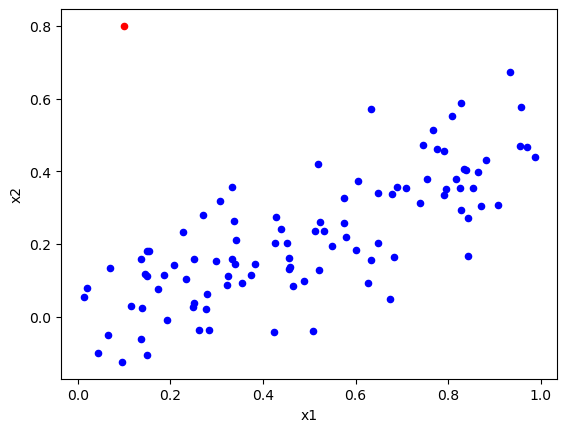

In [79]:
# Bivariate analysis (x1,x2)
sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x1',y='x2', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='x2', color='red');  # Plot last observation added in red

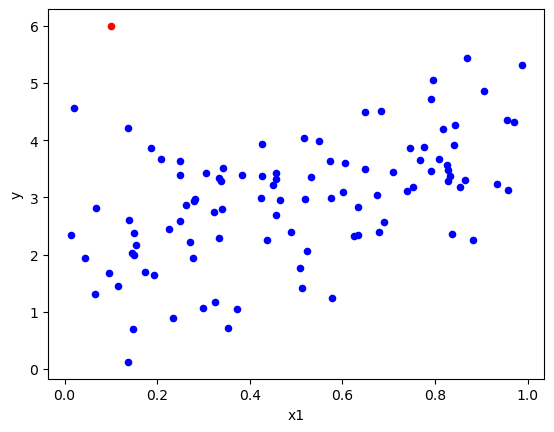

In [80]:
# Bivariate analysis (x1,y)
sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x1',y='y', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='y', color='red');  # Plot last observation added in red

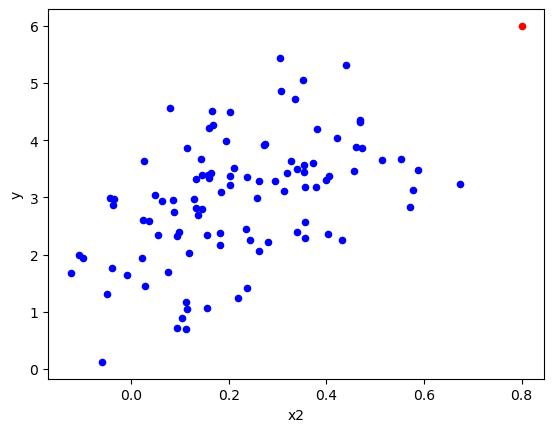

In [81]:
# Bivariate analysis (x2,y)
sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x2',y='y', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x2',y='y', color='red');  # Plot last observation added in red

### In summary: 
the observation added influences significantly the model, in particular if we consider the regression model that includes `x1` and `x2`. In this case, `x2`passed from a neglected variable to a significant variable. This means that even being just 1 observation in 100, this observation reduced the existing phenomenon of collinearity. Also, the R-squared of the model reduced, which signifies a decrease in the model predicition capacity.

According to the scatter plots, the observation added seems to be both an outlier and and an high leverage point. This conclusion can be taken from the visual observation of the observation added when confronted with the remaining observations. The added observations shows an unusual combination of predictor values, extreme predictor values and a substantial different behaviour when compared with other observations in several cases.

* https://onlinecourses.science.psu.edu/stat501/node/337
* Hair, J. F., Black, B., Babin, B., Anderson, R. E., & Tatham, R. L. (2010). Multivariate Data Analysis (7th ed.). Upper Saddle River, NJ: Prentice-Hall

## 3.15. 
This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [88]:
boston = pd.read_csv('Boston.csv')
df = boston.copy()
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

<Figure size 2000x2000 with 0 Axes>

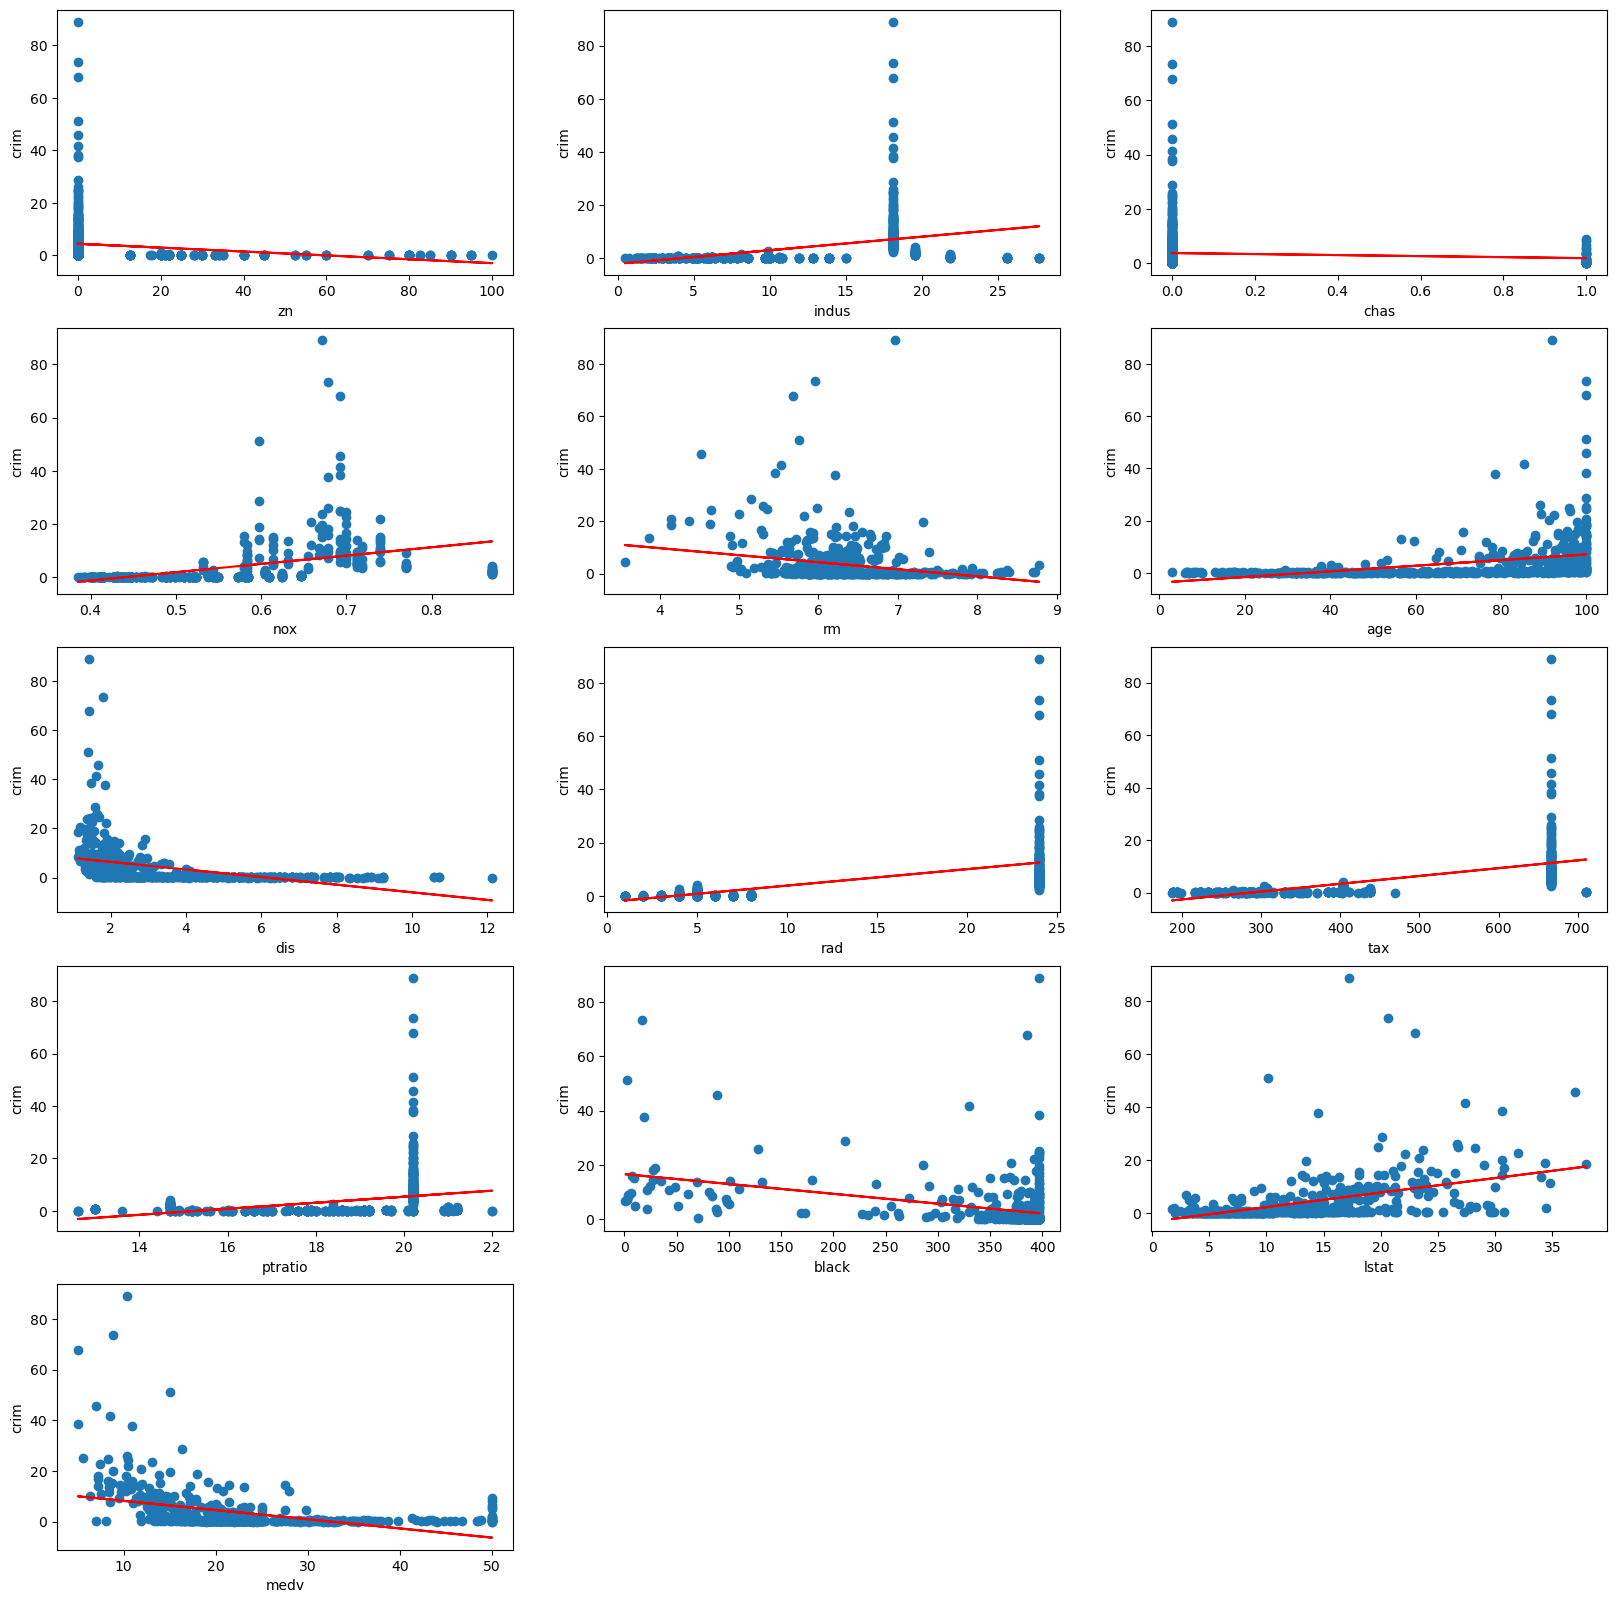

In [95]:
plt.figure(figsize=(20, 20))

predictors = [c for c in list(df) if c not in ["crim"]]
coefs = {}

plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = 'crim ~ ' + predictor
    res = smf.ols(formula = model, data=df).fit()
    coefs[predictor] = [res.params[predictor]] 
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("crim")
    plt.scatter(df[predictor], df['crim'])
    plt.plot(df[predictor], res.fittedvalues, color='red')
    

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : β_j = 0$?

In [96]:
all_columns = "+".join([c for c in list(df) if c not in ["crim"]])
model = " crim ~ " + all_columns
res = smf.ols(formula = model, data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.57e-56
Time:                        15:56:15   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the $x$-axis, and the multiple regression coefficients from (b) on the $y$-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the $x$-axis, and its coefficient estimate in the multiple linear regression model is shown on the $y$-axis.
`np.concatenate()`

In [97]:


for pred in coefs:
    coefs[pred].append(res.params[pred])
coefs

{'zn': [-0.07393497740412301, 0.04485521467003057],
 'indus': [0.5097763311042269, -0.06385482358770138],
 'chas': [-1.8927765508037848, -0.7491336105105721],
 'nox': [31.248531201122923, -10.313534912066753],
 'rm': [-2.68405122411395, 0.4301305058640547],
 'age': [0.10778622713953297, 0.001451643436182574],
 'dis': [-1.5509016824100992, -0.9871757255028865],
 'rad': [0.6179109273272022, 0.5882085914734899],
 'tax': [0.029742252822765325, -0.0037800163848590524],
 'ptratio': [1.1519827870705903, -0.2710805584722553],
 'black': [-0.0362796405673308, -0.00753750488849198],
 'lstat': [0.548804782062398, 0.12621137645949865],
 'medv': [-0.3631599222576029, -0.1988868212656226]}

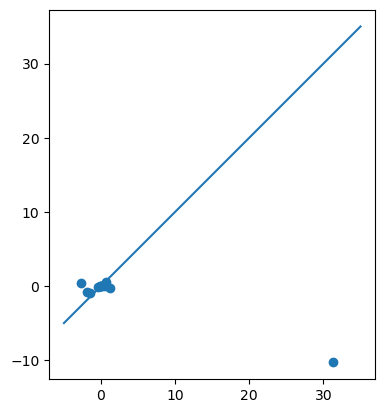

In [98]:
plt.scatter([coefs[pred][0] for pred in coefs], [coefs[pred][1] for pred in coefs])
plt.plot([-5,35],[-5,35]) # plot y=x
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

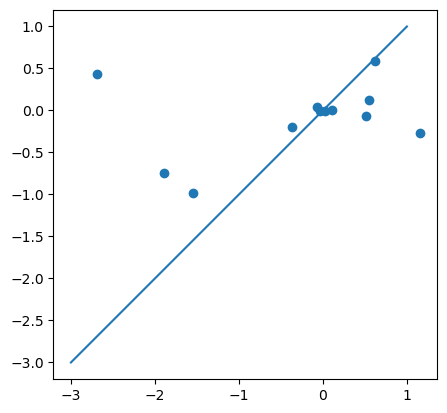

In [100]:
plt.scatter([coefs[pred][0] for pred in coefs if pred != "nox"], [coefs[pred][1] for pred in coefs if pred != "nox"])
plt.plot([-3,1], [-3,1]) # plot y=x
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [101]:
for pred in coefs:
    print("{:>9} {:>22} {:>24}".format(pred, coefs[pred][0], coefs[pred][1]))

       zn   -0.07393497740412301      0.04485521467003057
    indus     0.5097763311042269     -0.06385482358770138
     chas    -1.8927765508037848      -0.7491336105105721
      nox     31.248531201122923      -10.313534912066753
       rm      -2.68405122411395       0.4301305058640547
      age    0.10778622713953297     0.001451643436182574
      dis    -1.5509016824100992      -0.9871757255028865
      rad     0.6179109273272022       0.5882085914734899
      tax   0.029742252822765325   -0.0037800163848590524
  ptratio     1.1519827870705903      -0.2710805584722553
    black    -0.0362796405673308     -0.00753750488849198
    lstat      0.548804782062398      0.12621137645949865
     medv    -0.3631599222576029      -0.1988868212656226


As can be seen from the two plots and table above there's a reasonable correlation between the coefficients of the individual and multiple regressions, except for a couple of outliers (namely, NOX, and perhaps PTRATIO if we try to "fit" the line y=x).

However, since we can only reject the null hypothesis for DIS and RAD, the other values are not very meaningful. We would also expect them to differ significantly between the individual and multiple regression case, since in the former the coefficient is the average change in the response from a unit change in the predictor completely ignoring the other predictors. In the latter case, the coefficient is the average change in the response from a unit change in the predictor while holding the other predictor fixed. Because of possible correlations, non-linearities and collinearities between the predictors, there is no expectancy that, in general, the coefficients in each case will be of the same magnitude or sign.



(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form
$$
Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε.
$$

In [107]:
print("{:>13} {:>8} {:>8} {:>8} {:>8} {:>8}".format("Pvalues for", "beta_0", "beta_1", "beta_2", "beta_3", "f_pvalue"))

for predictor in predictors:
    model = 'crim ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    res = smf.ols(formula = model, data=df).fit()
    # http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
    print("{:>13} {:.6f} {:.6f} {:.6f} {:.6f} {:.6f}".format(predictor, res.pvalues[0], res.pvalues[1], res.pvalues[2], res.pvalues[3], res.f_pvalue))
    coefs[predictor] = [res.params[predictor]] 

  Pvalues for   beta_0   beta_1   beta_2   beta_3 f_pvalue
           zn 0.000000 0.002612 0.093750 0.229539 0.000001
        indus 0.020365 0.000053 0.000000 0.000000 0.000000
         chas 0.000000 0.679409 0.679409 0.679409 0.455276
          nox 0.000000 0.000000 0.000000 0.000000 0.000000
           rm 0.081483 0.211756 0.364109 0.508575 0.000000
          age 0.357797 0.142661 0.047377 0.006680 0.000000
          dis 0.000000 0.000000 0.000000 0.000000 0.000000
          rad 0.767832 0.623418 0.613010 0.482314 0.000000
          tax 0.104505 0.109708 0.137468 0.243851 0.000000
      ptratio 0.002462 0.003029 0.004120 0.006301 0.000000
        black 0.000000 0.138587 0.474175 0.543617 0.000000
        lstat 0.554115 0.334530 0.064587 0.129891 0.000000
         medv 0.000000 0.000000 0.000000 0.000000 0.000000


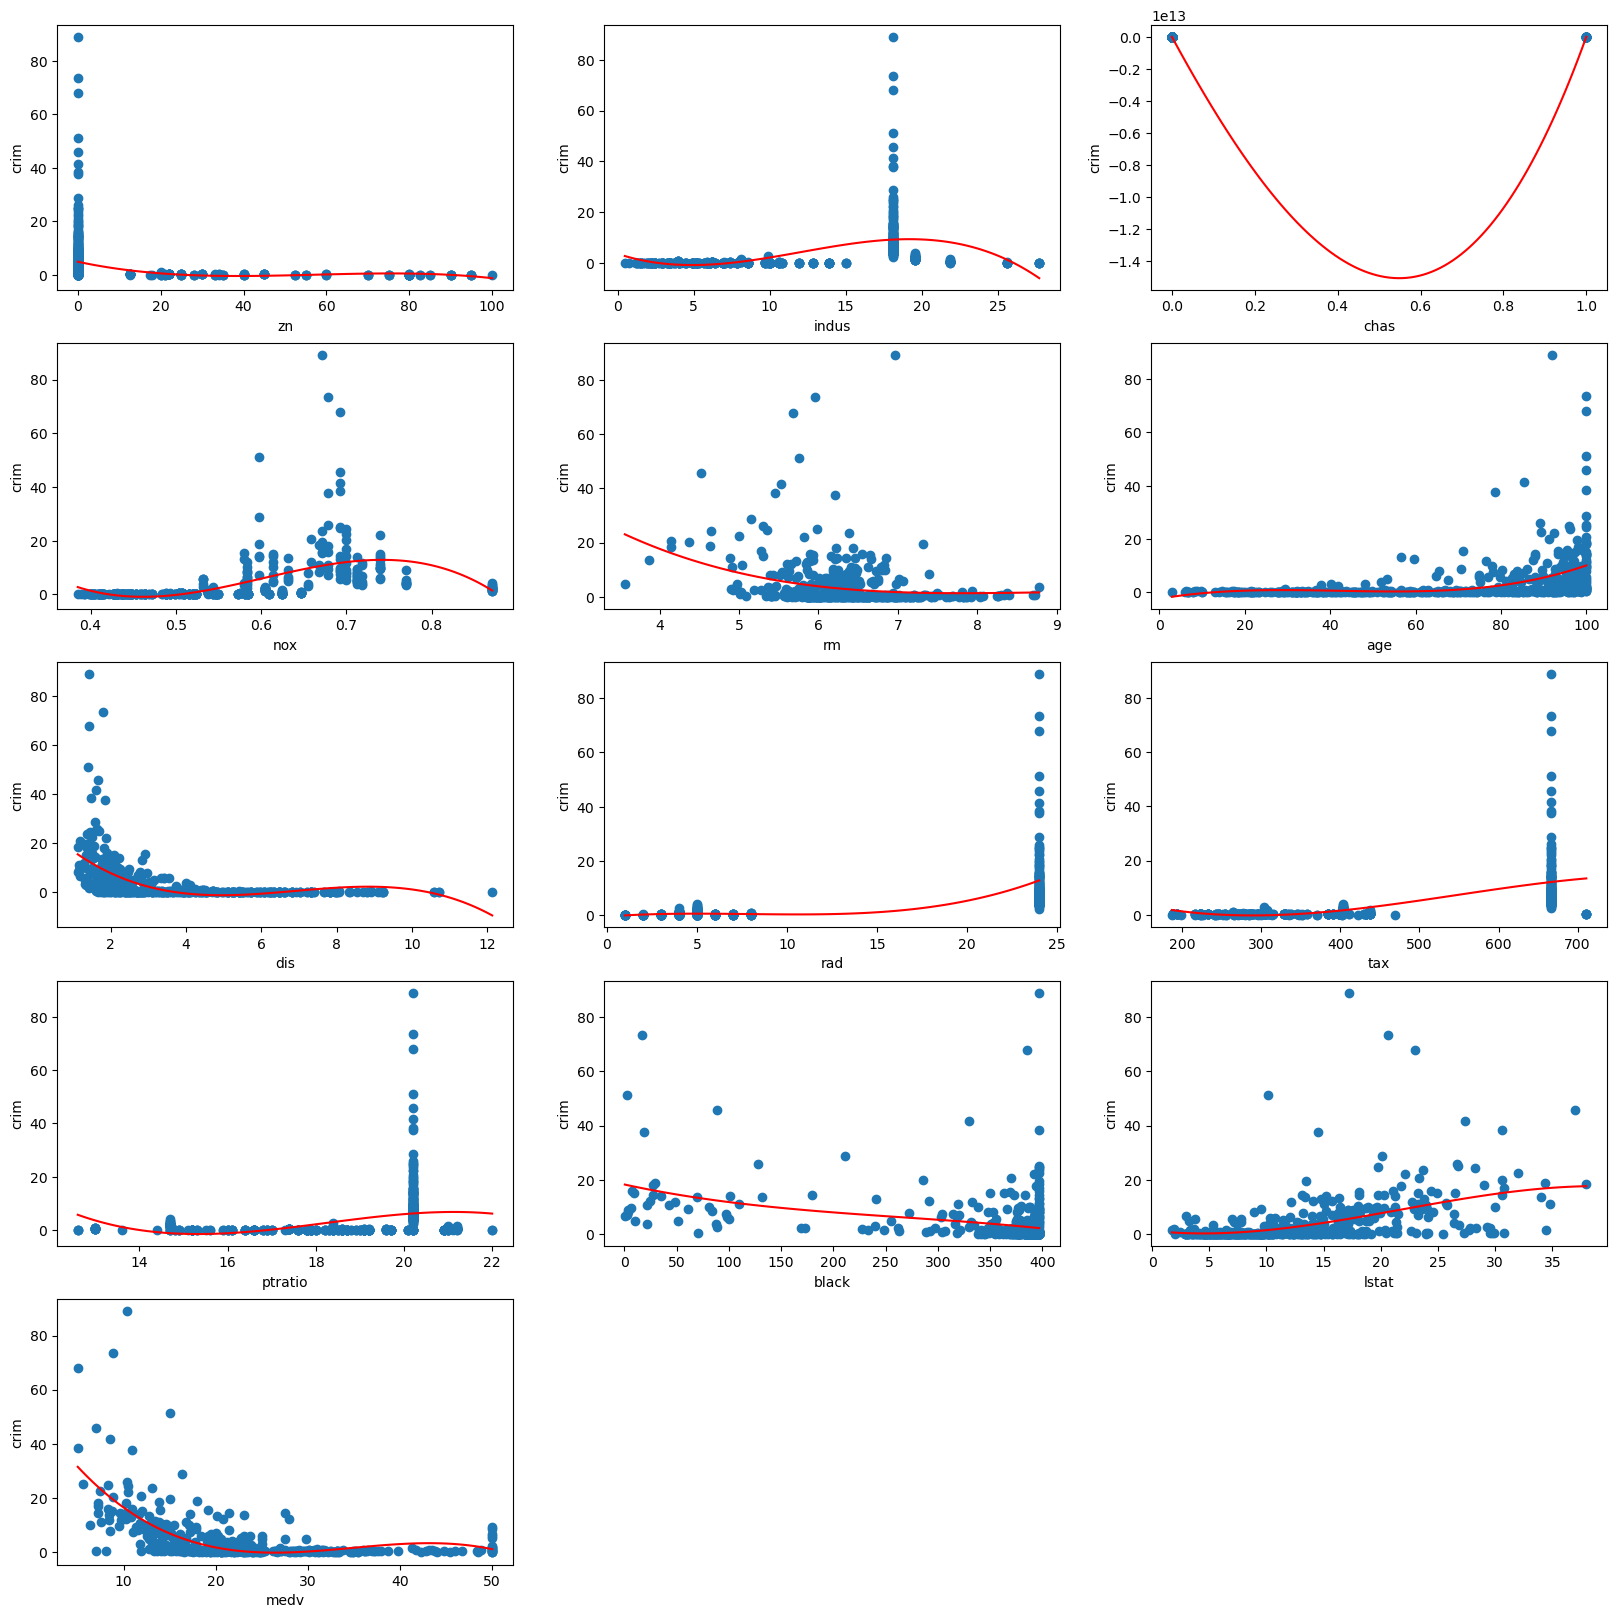

In [104]:
plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = 'crim ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    res = smf.ols(formula = model, data=df).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("crim")
    plt.scatter(df[predictor], df['crim'])
    x = np.linspace(min(df[predictor]),max(df[predictor]), 100)
    y = res.params[0] + x*res.params[1]+ res.params[2]*(x**2)+ res.params[3]*(x**3)
    plt.plot(x, y, color='red')    

From the plots and table above, we can find evidence of a non-linear association, cubic type, between INDUS, NOX, AGE, DIS, PTRATIO and MEDV. In general, to get a sense if a non-linear association is present, we can plot the residuals of the linear fit against the fitted values and see if there is a non-linear trend.